# Proyecto 3

## Aprendizaje Colaborativo Internacional en Línea

Esta tarea se encuentra en el marco de la aplicación del programa de Aprendizaje Colaborativo Internacional en Línea (COIL – siglas en inglés de “Collaborative Online International Learning”) de la Asociación de Universidades Confiadas a la Compañía de Jesús en América Latina (AUSJAL).

Se analizará el dataset partiendo de la pregunta:
¿Cómo ha evolucionado el balance comercial de México, Francia y Brasil durante el período 2010-2016?

Para ello se utilizó el siguiente dataset: https://www.kaggle.com/datasets/unitednations/global-commodity-trade-statistics/data

Debido al tamaño del archivo es necesario descargarlo y colocarlo en la carpeta data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [4]:
df = pd.read_csv('data/commodity_trade_statistics_data.csv')

countries = ['Mexico', 'France', 'Brazil']
df_filtered = df[df['country_or_area'].isin(countries)]

C:\Users\allys\AppData\Local\Temp\ipykernel_12108\3422449396.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/commodity_trade_statistics_data.csv')


In [5]:
def calculate_trade_balance(data):
    export_data = data[data['flow'] == 'Export'].groupby(['country_or_area', 'year'])['trade_usd'].sum()
    import_data = data[data['flow'] == 'Import'].groupby(['country_or_area', 'year'])['trade_usd'].sum()
    
    trade_balance = export_data - import_data
    return trade_balance.reset_index()

df_recent = df_filtered[df_filtered['year'].between(2010, 2016)]
trade_balance = calculate_trade_balance(df_recent)

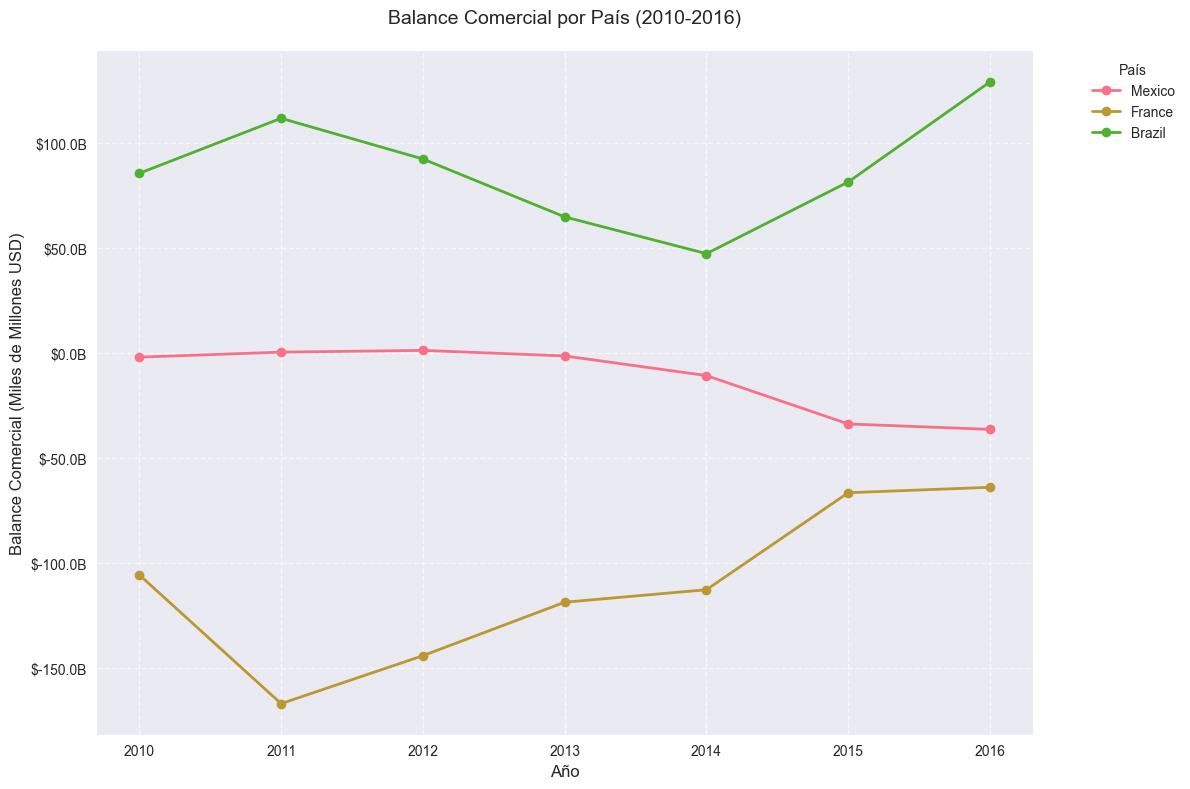

In [6]:
plt.figure(figsize=(12, 8))
for country in countries:
    country_data = trade_balance[trade_balance['country_or_area'] == country]
    plt.plot(country_data['year'], country_data['trade_usd'] / 1e9, 
             marker='o', linewidth=2, label=country)

plt.title('Balance Comercial por País (2010-2016)', fontsize=14, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Balance Comercial (Miles de Millones USD)', fontsize=12)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

def billions_formatter(x, pos):
    return f'${x:.1f}B'

plt.gca().yaxis.set_major_formatter(FuncFormatter(billions_formatter))

plt.tight_layout()

# Conclusiones

El análisis del balance comercial entre 2010 y 2016 revela patrones interesantes en las dinámicas comerciales de los tres países analizados. Brasil muestra una tendencia general positiva en su balance comercial, indicando que sus exportaciones superan consistentemente a sus importaciones, aunque con algunas fluctuaciones significativas durante el período. 
Francia, por su parte, mantiene un balance comercial relativamente estable pero negativo, lo que sugiere una dependencia constante de las importaciones. México presenta la mayor variabilidad en su balance comercial, con períodos de déficit y superávit, reflejando posiblemente su sensibilidad a los cambios en los mercados internacionales y sus estrechos vínculos comerciales con socios estratégicos.

Estas tendencias reflejan las diferentes estrategias comerciales y estructuras económicas de cada país. Brasil, con su fuerte sector de materias primas y productos agrícolas, tiende a mantener un superávit comercial. Francia, como economía desarrollada con alto consumo interno, mantiene un déficit comercial consistente. México, con su economía altamente integrada en cadenas de valor globales, muestra una mayor volatilidad en su balance comercial.